# TKET Intro

<br>
<br>

Kathrin Spendier (Quantum Evangelist)
&rarr; <kathrin.spendier@quantinuum.com>, 


Notebook and slides available at: &rarr; https://github.com/spendierk/TKET_intro_for_qiskit_users

## Contents

We will cover the following:
1. Why do we need Quantum Compilers?
2. Getting Started with TKET
3. Necessary Steps for Circuit Compilation
4. Compare TKET to Qiskit Preset Pass Managers
5. Preparing and Running Quantum Circuits on IBM Quito (ibmq_quito)

Appendix: Run on Quantinuum H1 emulator


# 1) Why do we need Quantum Compilers?

<div>
   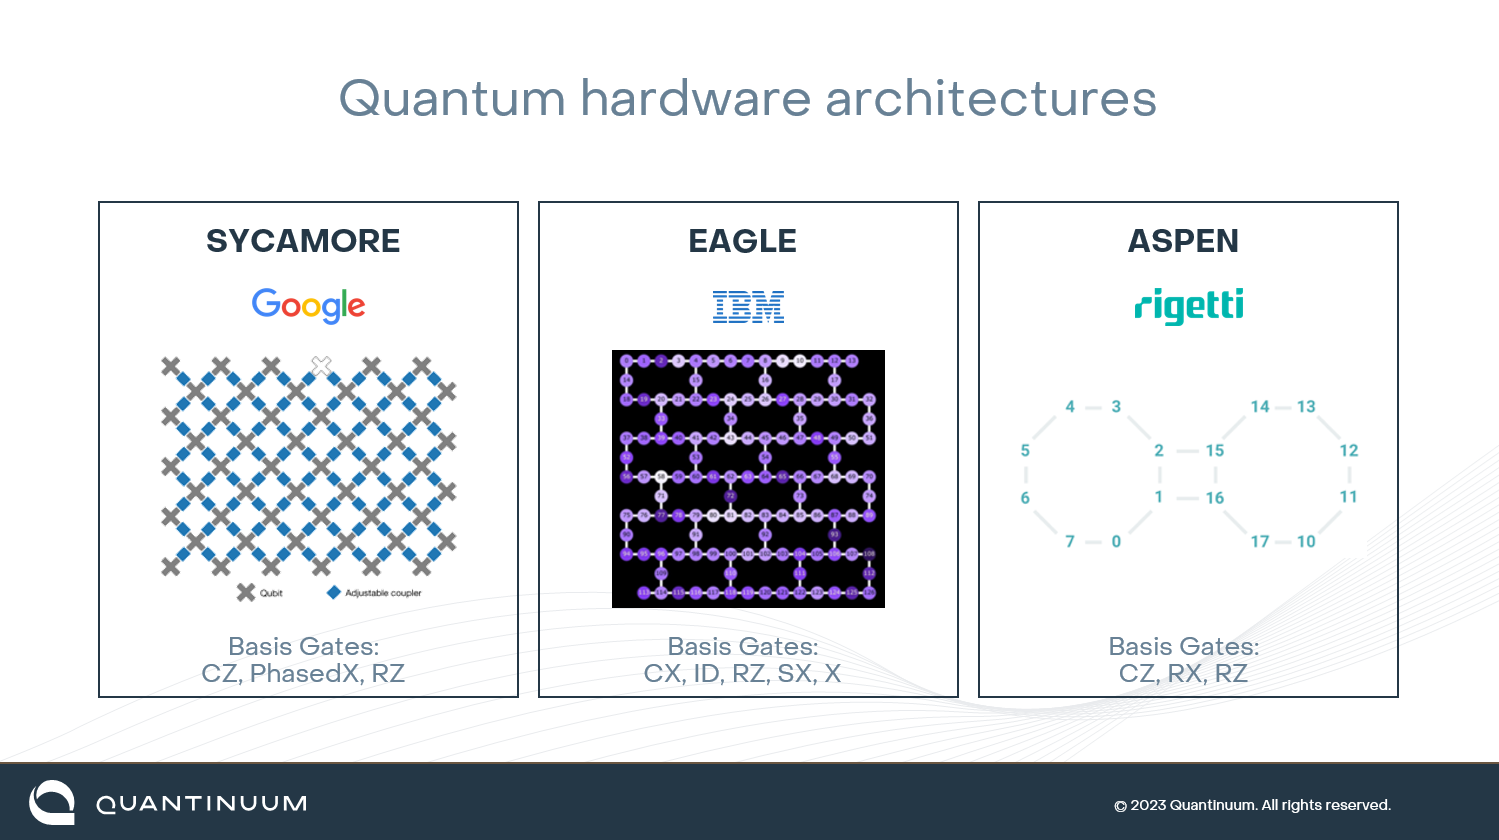
</div>

<div>
   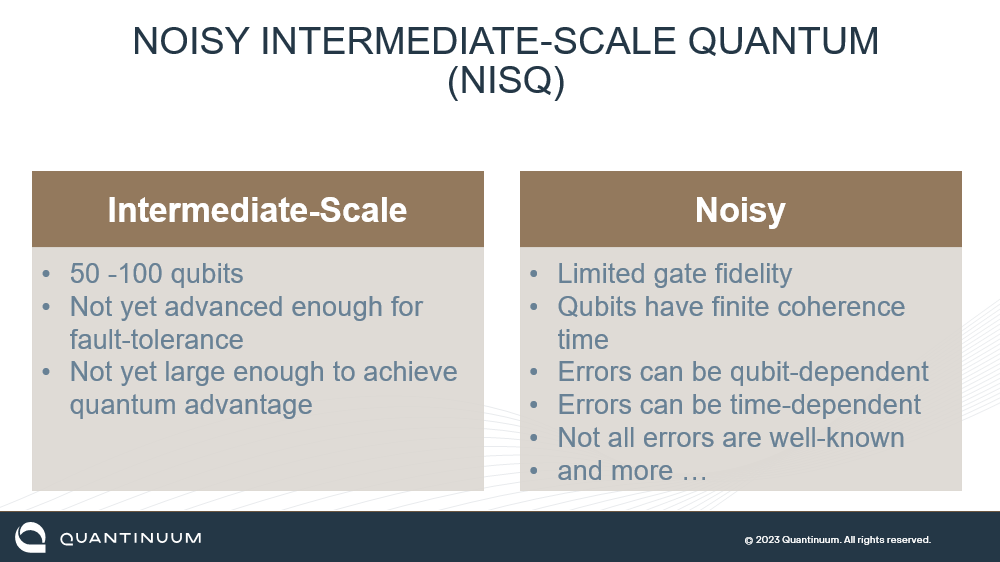
</div>

<div>
   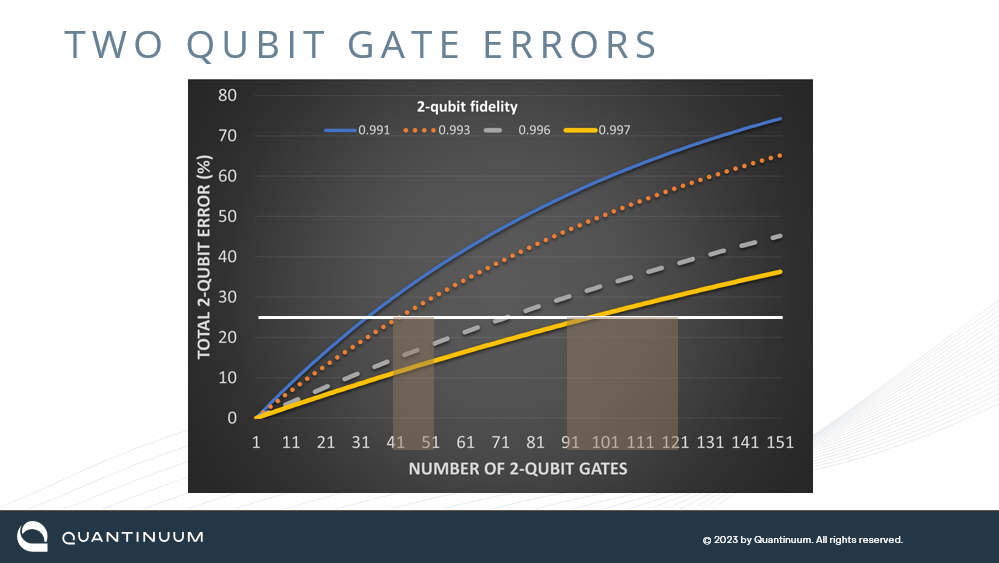
</div>

## What do we want to do?

##### GOAL:
Develop a quantum computing toolkit and optimizing compiler to make it easy for people to use gate-level quantum computers to solve their problems.

##### FEATURES:
 - Automatically handles many of the intricacies of NISQ technology.
 - Independent of the language used to apply a given algorithm. 
 - Independent of the quantum computer used to run the circuit.
 - Frees the user to focus on the technique or project they are working on.


<div>
   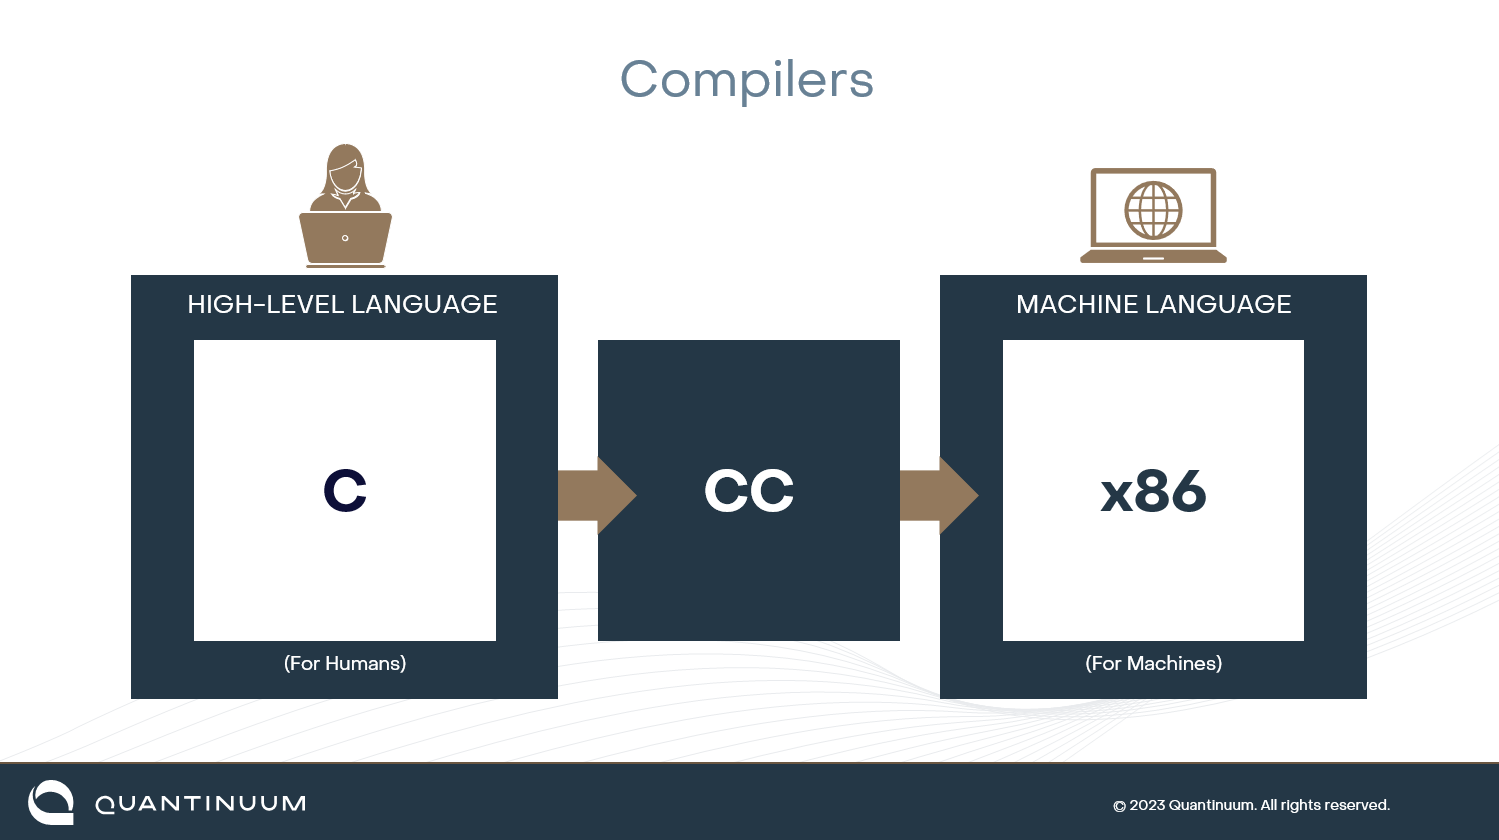
</div>

<div>
   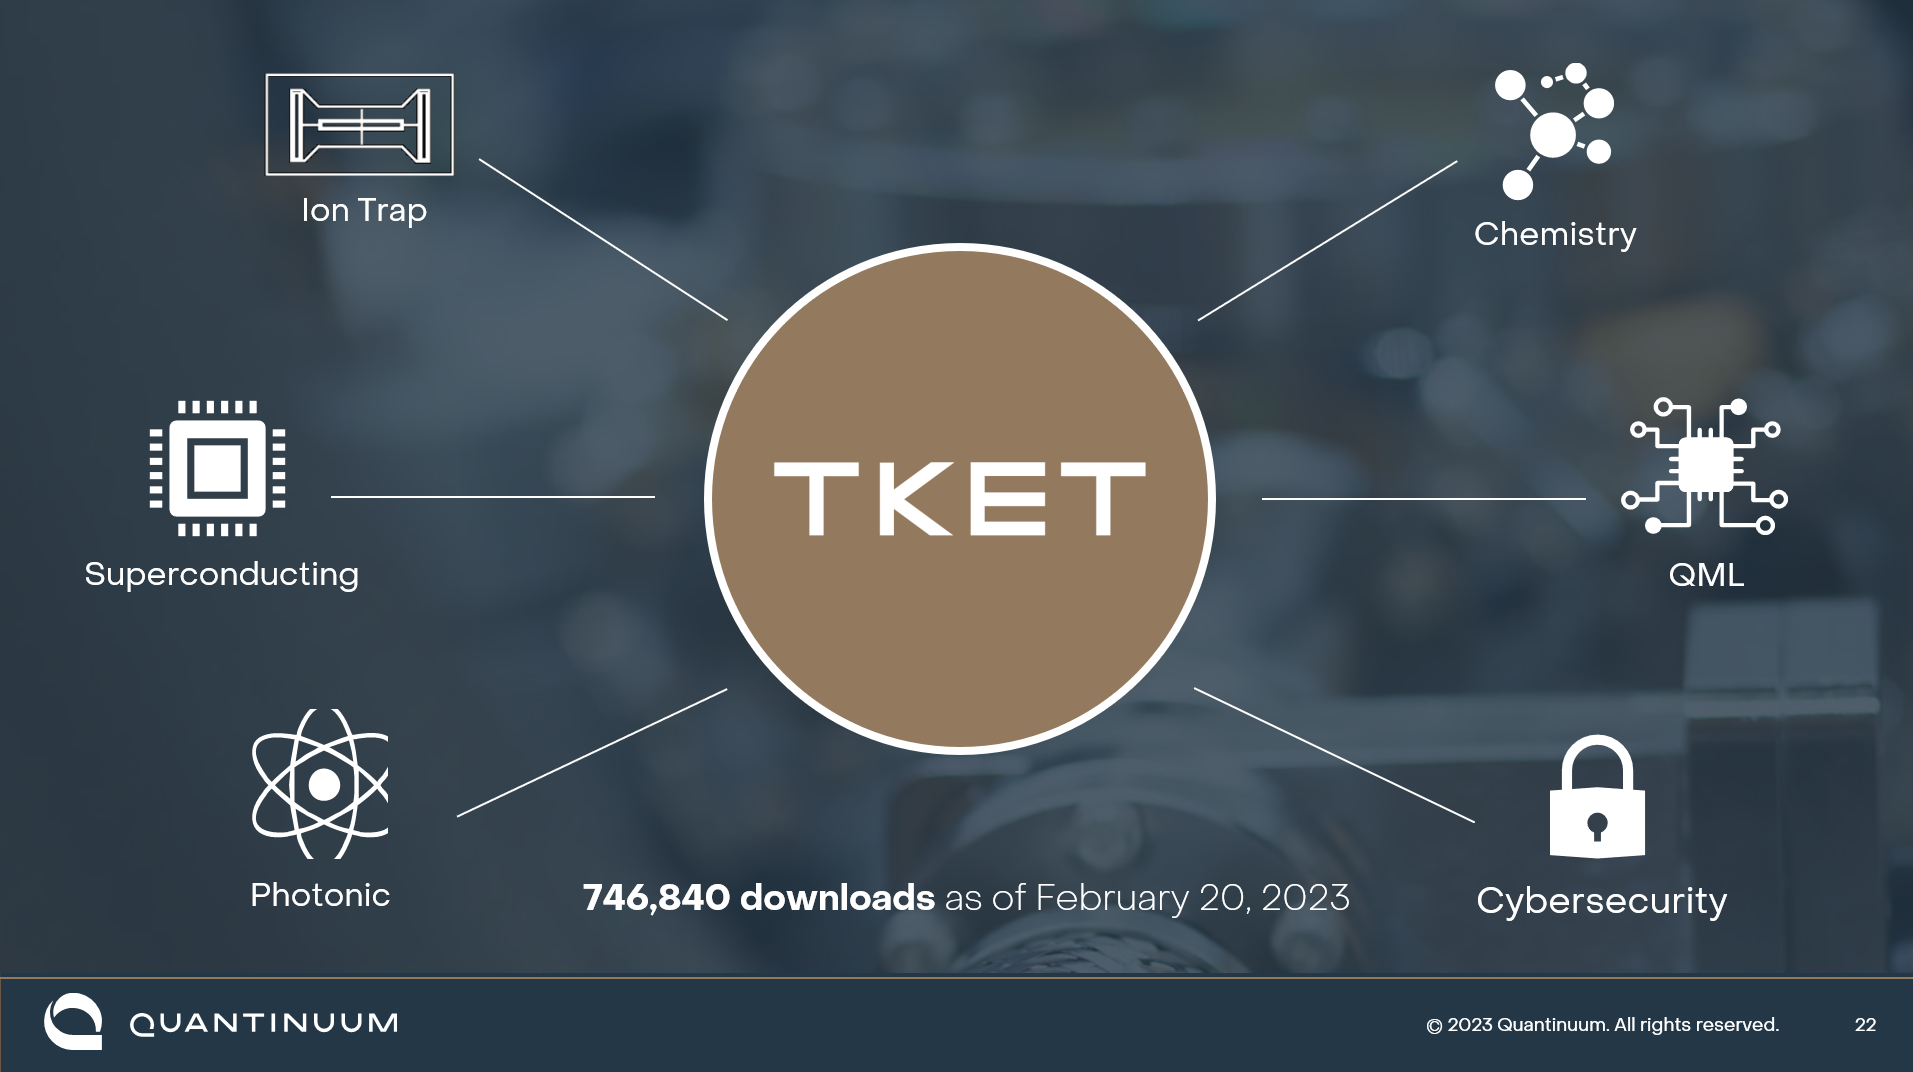
</div>

<div>
   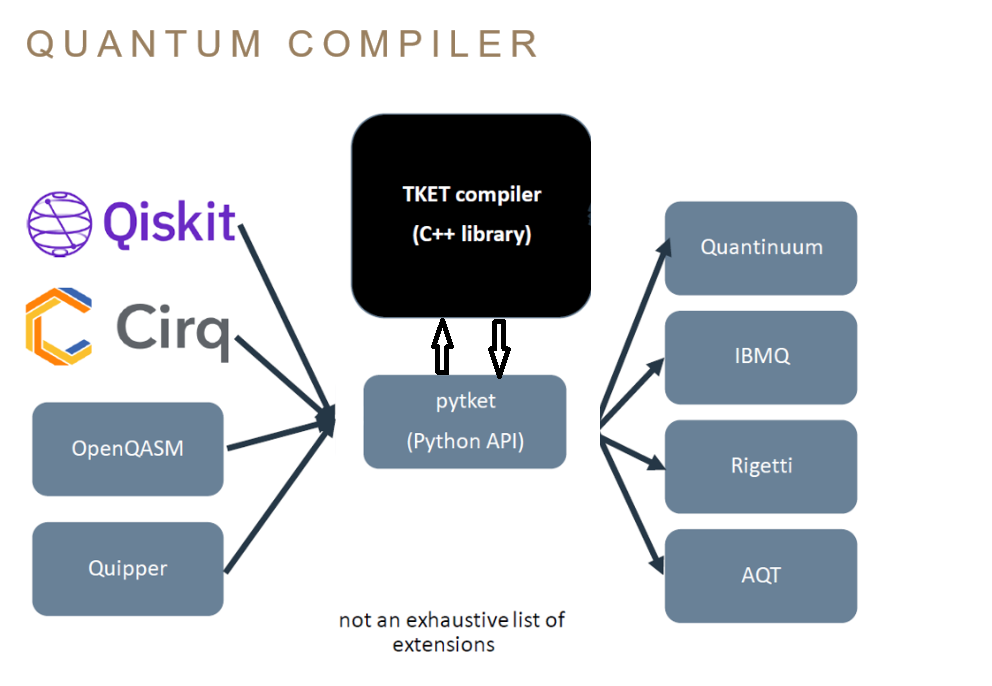
</div>

<div>
   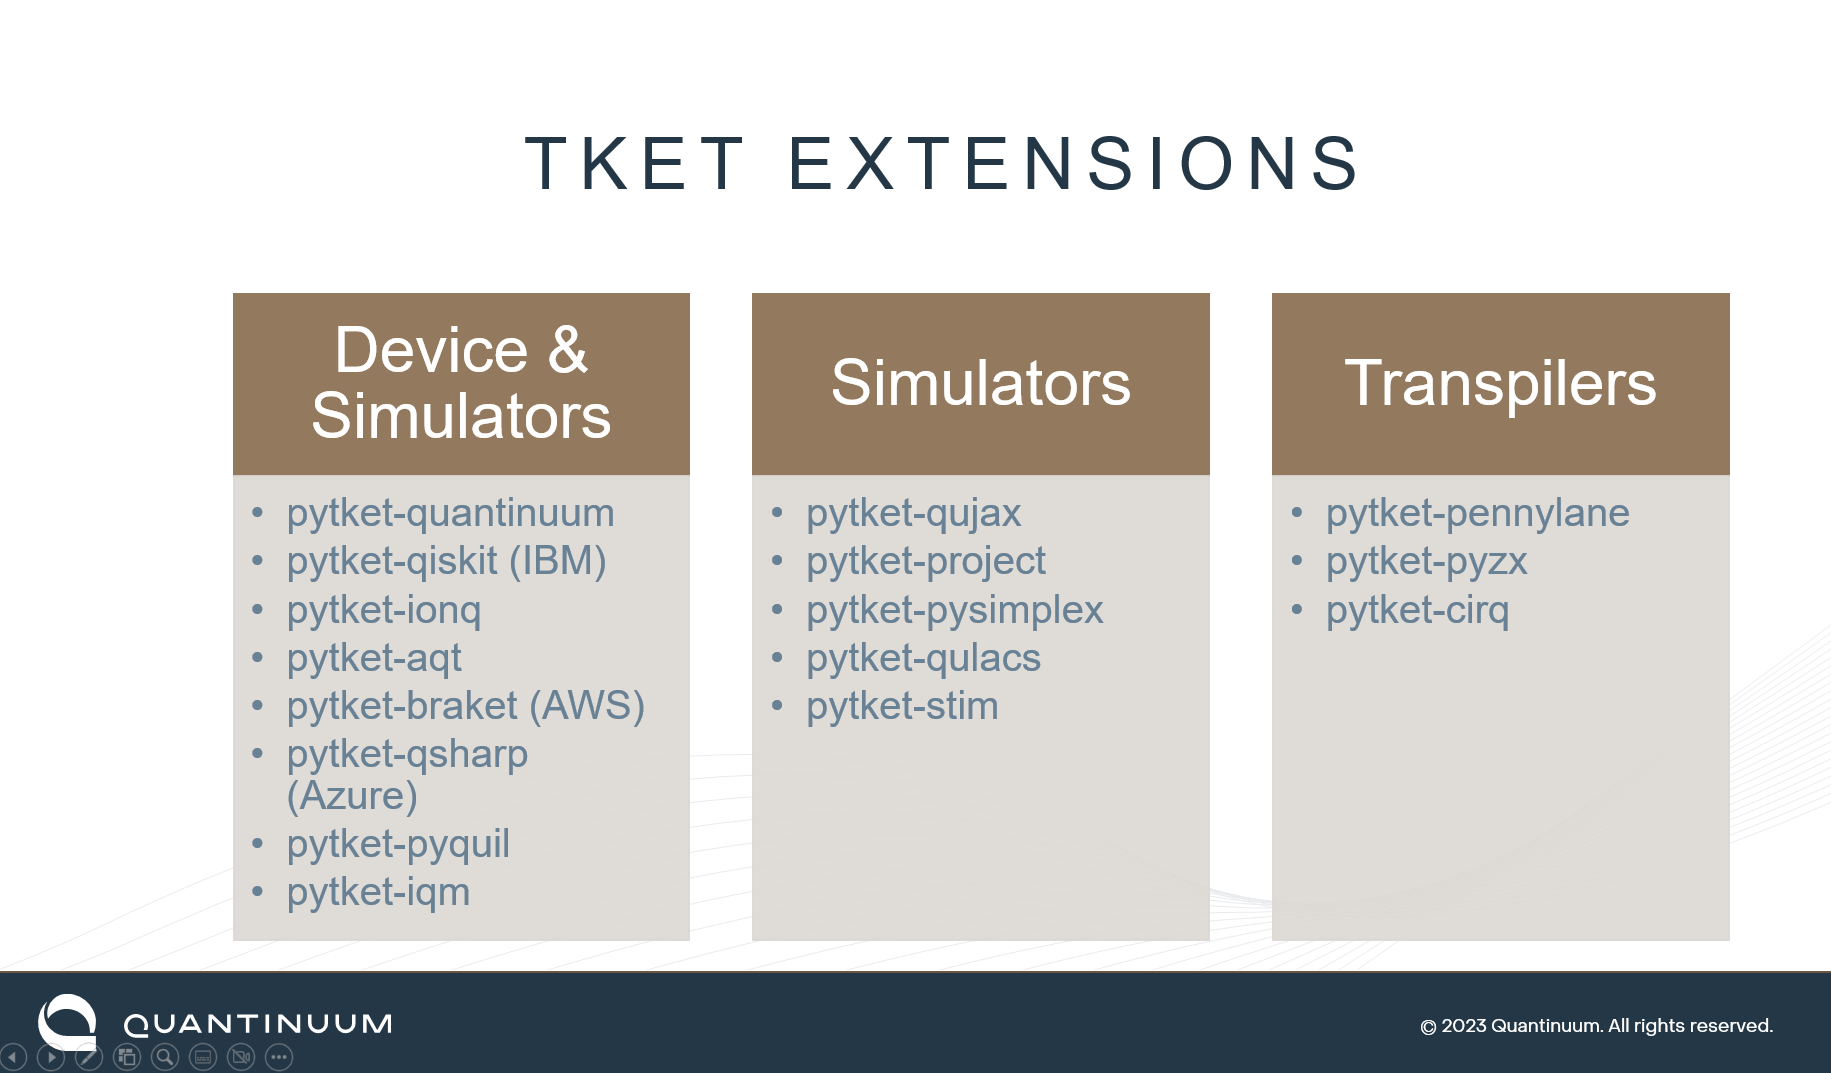
</div>

# 2) Getting Started with TKET

<p>There is currently an implementation of TKET available in the form of the pytket python package.</p>
<p><center> <code> pip install pytket </code> </center></p>
<p>Additional extension modules are available for interfacing pytket with several quantum software packages, including: Qiskit, Cirq, PennyLane, pyQuil, and others.</p>
<p><center> <code> pip install pytket-qiskit </code> </center></p>
<p><center> <code> pip install pytket-pennylane </code> </center></p>
<p>Documentation and examples are available &rarr; <a href="https://cqcl.github.io/pytket/manual/index.html">https://cqcl.github.io/pytket/manual/index.html</a>.</p>



## Basic Gates for a Bell State

Let's start by building a familiar circuit to generate the bell pair:
\\[ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 00 \right\rangle + \left| 11 \right\rangle\right) \\]
The simplest way to build a circuit in pytket is by adding gates sequentially.

## The <code>Circuit</code> class 

is the unit of computation sent to a quantum processor. Gates are added in order of execution. The circuit is typically assumed to act on the state \\(\left| 0^n \right\rangle\\), producing a new state at the end.

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(2) #initialize the circuit class acting on two qubits
circ.H(0).CX(0,1)

render_circuit_jupyter(circ)


The tools to run circuits in pytket belong into the extensions. These tools call backends of some kind.

We will use here the AerStateBackend by Qiskit, a classical full state vector simulator. We can access this simulator through pytket as follows

In [2]:
from pytket.extensions.qiskit import AerStateBackend
import numpy as np

backend = AerStateBackend() #initialize backend with default settings
result = backend.run_circuit(circ) #interface for running circuit on a given backend to obtain results
result_state = result.get_state() #for results we get the full state vector of the output

print(f"State vector -> {np.round(result_state, 3)}")   # prints (0,0), (1,0), (0,1), (1,1) states


State vector -> [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


In [3]:
###########################################
# Needed code in order to plot results
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_state_probs(state):
    state_dict = {'State':[i for i in range(len(result_state))], 'Probability':abs(state)**2}
    state_df = pd.DataFrame(state_dict)
    sns.catplot(x='State', y='Probability', kind='bar', data=state_df, aspect = 3, height=2)
    plt.show()
#######################################################################    


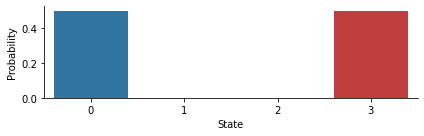

In [4]:
circ = Circuit(2).H(0).CX(0,1)

backend = AerStateBackend()
result_state = backend.run_circuit(circ).get_state()

plot_state_probs(result_state)

## TKET also includes a plethora of other gates

For more infromation on other gates please refer to the pytket APIs of  

pytket.circuit.OpType → https://cqcl.github.io/tket/pytket/api/optype.html

and pytket.circuit.Circuit → https://cqcl.github.io/tket/pytket/api/circuit_class.html


## Measurement

Measurement is the final step of a quantum circuit producing classical data from the resulting state. All measurements are single-qubit measurements in the \\( \mathsf{Z} \\) basis.

We have a qubit (a superposed quantum state) formed by some linear combination of \\(\left| 0 \right\rangle\\) and \\(\left| 1 \right\rangle\\). After measurement, it becomes a classical bit (0 or 1).


In [5]:
circ = Circuit(2,2).H(0).CX(0,1).measure_all()
render_circuit_jupyter(circ)


In [6]:
###########################################
# Needed code in order to plot results
    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 3, height=2)
    plt.show()
#######################################################################    

## Noiseless Simulator

The default behavior of the AerSimulator backend is to mimic the execution of an actual device. If a QuantumCircuit containing measurements is run it will return a count dictionary containing the final values of any classical registers in the circuit.

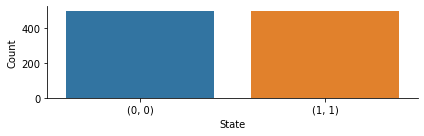

Counter({(0, 0): 501, (1, 1): 499})


In [7]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()
result_counts = backend.run_circuit(circ, n_shots=1000).get_counts()
plot_counts(result_counts)
print(result_counts)

# Inclusivisty, Importing, and Exporting

TKET allows users to:
- Seamlessly move between software packages.
- Import/Export circuits to commonly accepted standard representations.

Converters for other quantum software frameworks can optionally be included by installing the corresponding extension module. These are additional PyPI packages with names pytket-X.
<p><center> <code> pip install pytket-qiskit </code> </center></p>

Let's code the fist Bell state using IBM's quantum SDK, called Qiskit.

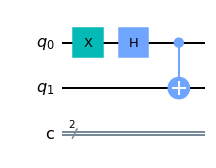

In [8]:
from qiskit import QuantumCircuit

qiskit_circ = QuantumCircuit(2, 2)
qiskit_circ.x(0)
qiskit_circ.h(0)
qiskit_circ.cx(0, 1)

qiskit_circ.draw(output='mpl')


In [9]:
from pytket.extensions.qiskit import qiskit_to_tk

tket_circ = qiskit_to_tk(qiskit_circ)
tket_circ.H(0)
tket_circ.measure_all()

render_circuit_jupyter(tket_circ)


## Importing / Exporting circuits

### OpenQASM

- Open quantum assembly language 
- Can be used to write circuits
- Servers as a platform-independent method of storing circuits
- TKET has bidirectional conversion support for QASM

### Chemistry-Inspired Circuit for $H_2$  

Sample circuit to compute the ground state energies for the hydrogen atom was obtained by InQuanto using the simplest qubit mapper/converter called the Jordan-Wigner Mapper.

In [10]:
from pytket.qasm import circuit_from_qasm, circuit_to_qasm, circuit_to_qasm_str

circ = circuit_from_qasm('H2JordanWignerMapper.qasm')
render_circuit_jupyter(circ)


# 3) Necessary Steps for Circuit Compilation

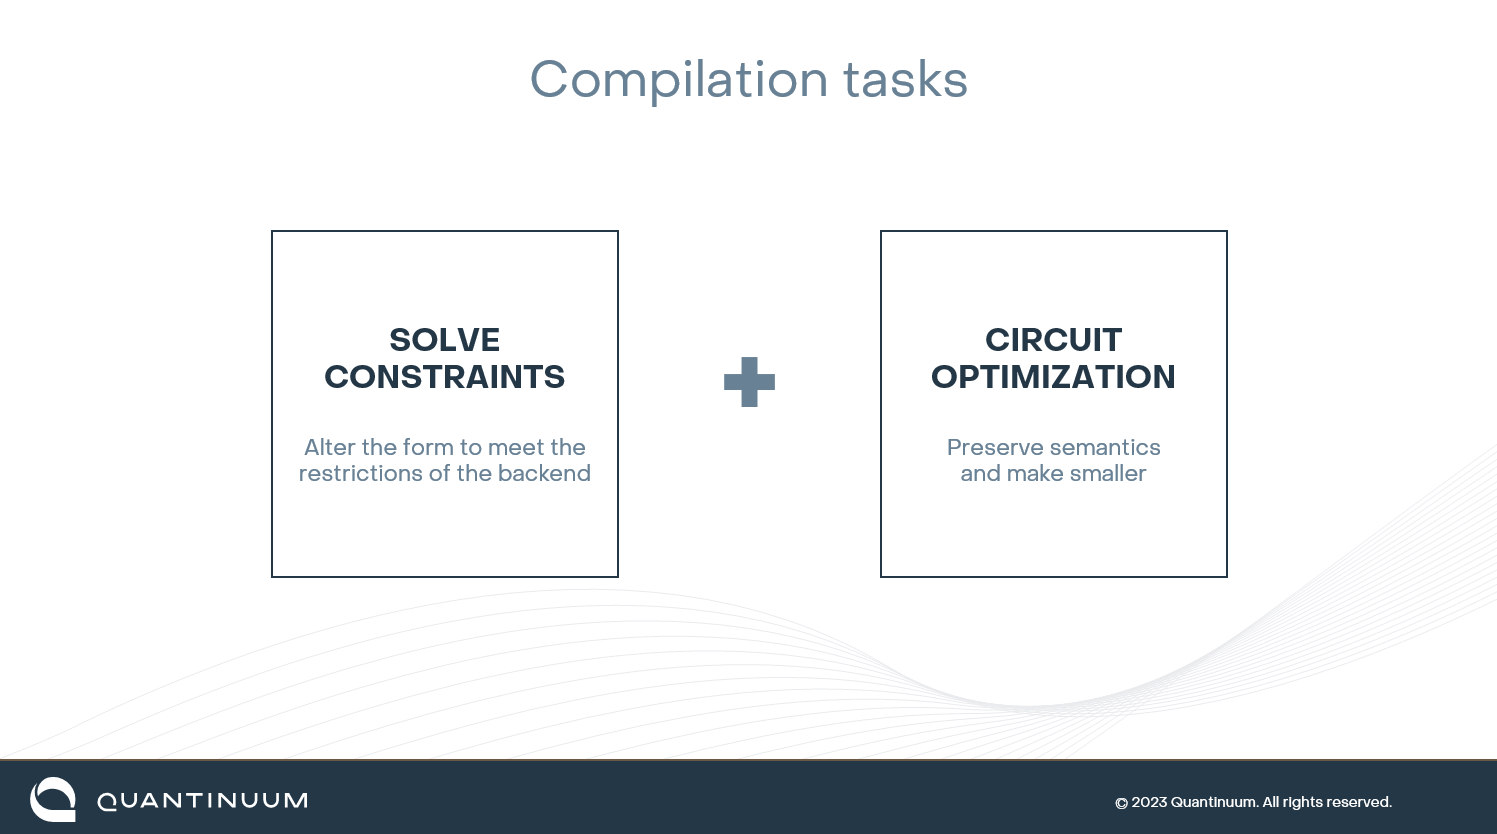

## Example circuit:

After applying the so-called Jordan- Wigner transform, we will focus again on the circuit obtained from a qubit Hamiltonian. This circuit can be used to calculate the ground state energy of molecular Hydrogen, H2, where the two atoms are configured to be at a distance of 0.735 angstroms. 

You can find more information about this transformation here:
https://github.com/Qiskit/qiskit-nature/blob/stable/0.4/docs/tutorials/01_electronic_structure.ipynb

In [11]:
from pytket.qasm import circuit_from_qasm
from pytket.circuit.display import render_circuit_jupyter

circ = circuit_from_qasm('H2JordanWignerMapper.qasm')
render_circuit_jupyter(circ)


#### We aim to optimize this circuit for the ibmq_quito backend and then run it.

## Example Backend: ibmq_quito

Coherence time (~0.1s) is the limit on how long a qubit can retain its quantum state before that state is ruined by noise. 

<div>
   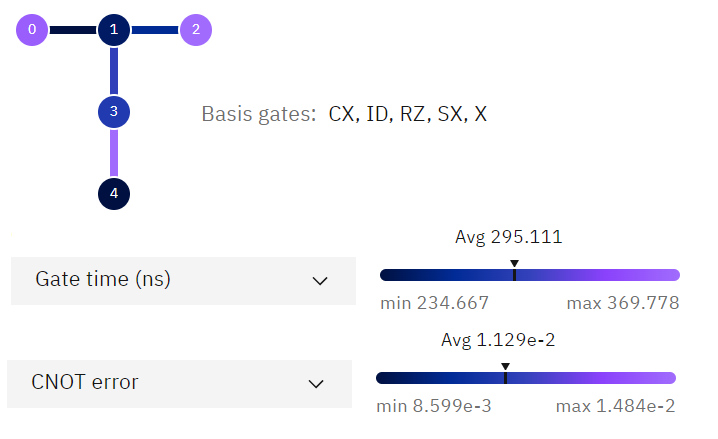
</div>

### Predicates

Solving the constraints of the target Backend is the essential goal of compilation, so our choice of passes is mostly driven by this set of constraints.

<code>Backend.required_predicates</code> property gives a collection of predicates, describing the necessary properties a Circuit must satisfy in order to be run.

Note that one needs to create an IBMQ account and has an IBMQ access token [here](https://quantum-computing.ibm.com/login).

In [16]:
from pytket.extensions.qiskit.backends.config import set_ibmq_config
from pytket.extensions.qiskit import IBMQBackend

set_ibmq_config(ibmq_api_token="MyToken",hub="ibm-q",group="open",project="main")
backend = IBMQBackend('ibmq_quito', hub='ibm-q', group='open', project='main')

print(backend.required_predicates)


[NoFastFeedforwardPredicate, NoSymbolsPredicate, GateSetPredicate:{ Reset X SX Rz noop Barrier CX Measure }]


- NoSymbolsPredicate: Predicate asserting that no gates in the circuit have symbolic parameters.
- U gates are used by IBM
- noop : Identity gate. These gates are not permanent and are automatically stripped by the compiler

In [17]:
from pytket import OpType

print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")

render_circuit_jupyter(circ)


Number of gates = 150
Circuit depth = 83
Number of CX gates = 56


Calling <code>Backend.valid_circuit()</code> can check whether or not a Circuit satisfies every requirement to run on the Backend

In [18]:
backend.valid_circuit(circ)


False

### Rebase

Substitute each gate in a Circuit with an equivalent sequence of gates in the target gateset according to some known gate decompositions. 

In pytket, we define a rebase to the IBM gateset with <code>auto_rebase_pass</code>.

In [19]:
from pytket.passes import auto_rebase_pass

ibm_rebase = auto_rebase_pass({OpType.X,OpType.SX,OpType.Rz,OpType.CX})
ibm_rebase.apply(circ);
render_circuit_jupyter(circ)


In [20]:
backend.valid_circuit(circ)


True

In [21]:
print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")


Number of gates = 250
Circuit depth = 115
Number of CX gates = 56


### Placement

- Initially, a Circuit designed without a target device in mind will be expressed in terms of actions on a set of “logical qubits”. 
- A placement (or initial mapping) is a map from these logical qubits to the physical qubits of the device that will be used to carry them. 
- A given placement may be preferred over another if the connectivity of the physical qubits better matches the interactions between the logical qubits caused by multi-qubit gates, or if the selection of physical qubits has better noise characteristics. 
- All of the information for connectivity and noise characteristics of a given Backend is wrapped up in a <code>BackendInfo</code> object by the <code>Backend.backend_info</code> property.

Let's visualize the connectivity of the current circuit after applying the Rebase pass.

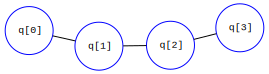

In [22]:
from pytket.utils import Graph

Graph(circ).get_qubit_graph()


We see that we have a linear qubit connectivity. 

Let's have a look at the connectivity of the IBM Quito device (nearest-neighbor).

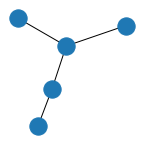

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(backend.backend_info.architecture.coupling)
plt.figure(figsize=(1.8,1.8))
nx.draw(G)
plt.show() # This is how the qubits are laid out on the device


Now we need to place the qubits in the circuit onto the qubit layout of the actual device.

In [24]:
from pytket.passes import PlacementPass, RoutingPass
from pytket.predicates import ConnectivityPredicate
from pytket.placement import GraphPlacement

place = PlacementPass(GraphPlacement(backend.backend_info.architecture))
place.apply(circ)


True

Now the qubits are connected as follows 

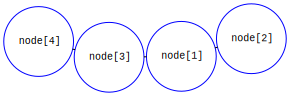

In [25]:
Graph(circ).get_qubit_graph()


Let's check the total number of gates and CNot gates:

In [26]:
print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")


Number of gates = 250
Circuit depth = 115
Number of CX gates = 56


Stayed the same in this case, but for other circuits it could increase because of possibly needing SWAP gates.

### Optimizations

We need additional techniques we can use to obtain more reliable results by reducing the noise and probability of error. 

- Find an alternative Circuit that is observationally equivalent in a perfect noiseless setting but uses fewer resources (i.e. gates, time). 
- The simplest optimizations will take an inefficient pattern, find all matches in the given Circuit and replace them by the efficient alternative.
- i.e. <code>RemoveRedundancies</code> pass, which looks for a number of easy-to-spot redundant gates, such as zero-parameter rotation gates, gate-inverse pairs, adjacent rotation gates in the same basis, and diagonal rotation gates followed by measurements.

<div>
   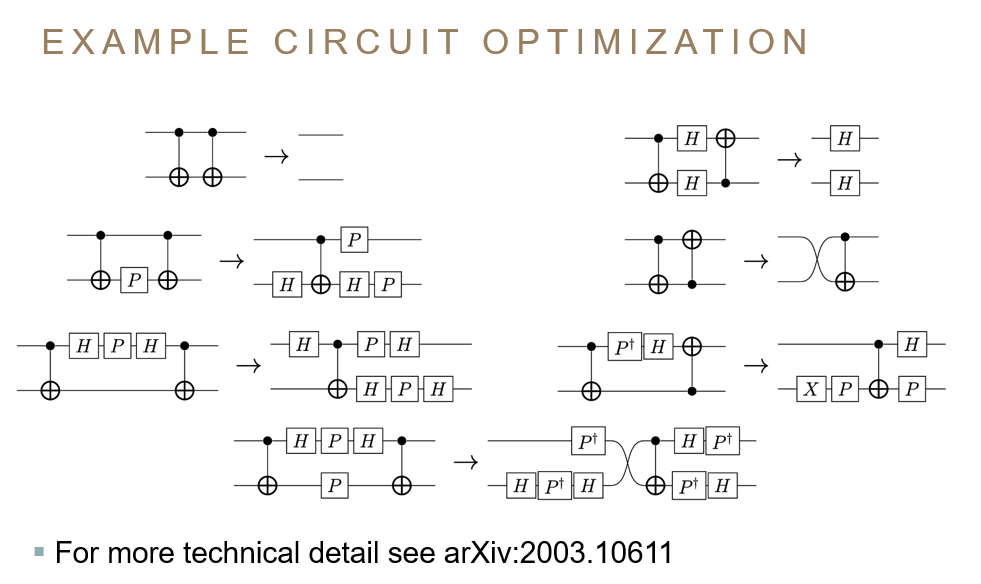
</div>

<div>
   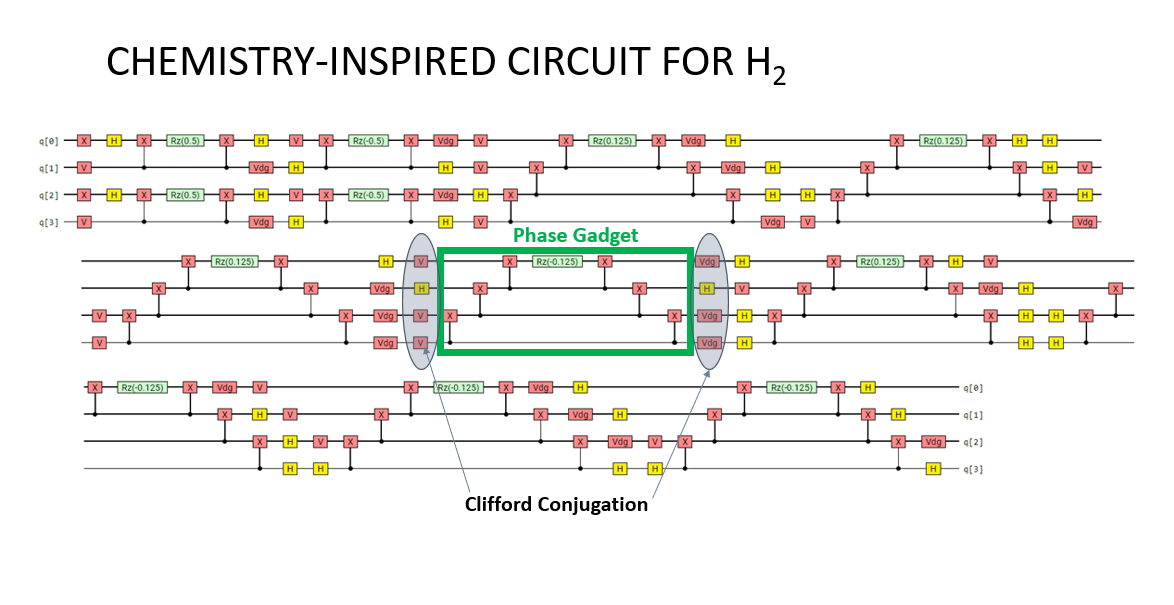
</div>

##  The <code>CliffordSimp()</code> Pass

 - Commutation- and basis-invariant Clifford reduction

In [27]:
from pytket.passes import CliffordSimp

CliffordSimp().apply(circ)
render_circuit_jupyter(circ)
print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")


Number of gates = 45
Circuit depth = 29
Number of CX gates = 18


# 4) Compare TKET to Qiskit Preset Pass Managers

<div>
   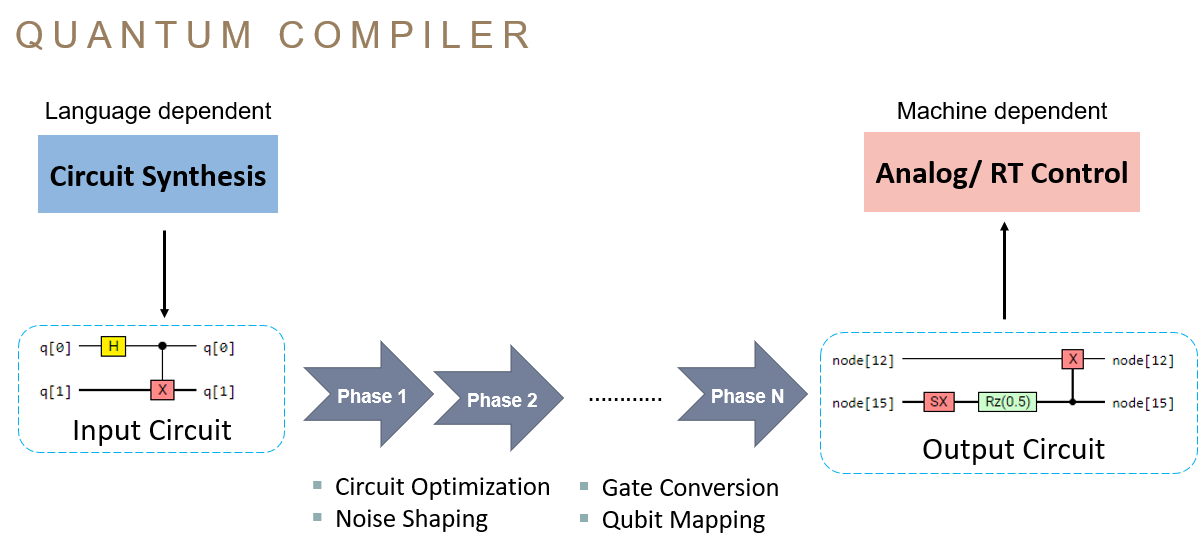
</div>

## TKET's default pass manager for Backends

TKET has a default pass manager for each backend that is called by:

<p><center> <code> get_compiled_circuit(circuit,optimisation_level) </code> </center>

There are three compilation levels:
- \\( \textsf{Level 0} \\) just solves the device constraints without optimizing.
- \\( \textsf{Level 1} \\) additionally performs some light optimizations.
- \\( \textsf{Level 2} \\) adds more intensive optimizations that can increase compilation time for large circuits. (This level is the default level)

Compile the initial circuit to IBM Quito by solving the device constraints with the default compilation pass and optimization Level 2. Please refer to https://cqcl.github.io/pytket-qiskit/api/index.html for details regarding passes applied at Level 2.

In [28]:
circ_initial = circuit_from_qasm('H2JordanWignerMapper.qasm')
compiled_qft_circ = backend.get_compiled_circuit(circ_initial,2)
render_circuit_jupyter(compiled_qft_circ)

print(f"Number of gates = {compiled_qft_circ.n_gates}")
print(f"Circuit depth = {compiled_qft_circ.depth()}")
print(f"Number of CX gates = {compiled_qft_circ.n_gates_of_type(OpType.CX)}")


Number of gates = 78
Circuit depth = 51
Number of CX gates = 19


## Qiskit Preset Pass Managers (Qiskit version 0.41)

Let's optimize this circuit using a Qiskit preset pass manager. Qiskit comes with several pre-defined pass managers, corresponding to various levels of optimization achieved through different pipelines of passes. Currently optimization_level 0 through 3 are supported; the higher the number, the more optimized it is, at the expense of more time. Choosing a good pass manager may take trial and error, as it depends heavily on the circuit being transpiled and the backend being targeted. For more information see here: https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html


In [29]:
qc = QuantumCircuit.from_qasm_file("H2JordanWignerMapper.qasm")


In [30]:
from qiskit.providers.fake_provider import FakeQuito

backend = FakeQuito()     # mimics the quito device in terms of coupling map and basis gates


In [31]:
from qiskit.compiler import transpile
optimized_3 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 75), ('sx', 41), ('cx', 37), ('x', 7)])
depth =  79


TKET's highest default optimization pass performed better than Qiskit's highest default pass. TKET reduced the initial 83 layers to 51 and the initial 56 CX gates to 19.

Here is a summary of the results in a table:

| Default Transpiler Pass | Total Layers | Number of CX gates |
| --- | --- | --- |
| None | 83 | 56 | 
| Qiskit - level 3 | 79 | 37 | 
| TKET - level 2 | 51 | 19 | 

#### Now in today's NISQ area, this difference in reduction of CX gates can matter, deciding between the success and failure of implementing a circuit on a real quantum computer.

# 5) Running Quantum Circuits on IBMQ Quito

We will first run the circuit on the ibmq_quito 
emulator (classical simulator that mimics the connectivity, coherence time, and errors of the device.

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
##################### code for plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 5, height=3)
    plt.show()
############################

### Run circuit on the ibmq_quito emulator  - initial rebase and routing only

runtime_job._start_websocket_client:WARNING:2023-03-20 18:36:01,351: An error occurred while streaming results from the server for job cgcfnncrrrehokebtgf0:
Traceback (most recent call last):
  File "C:\Users\kathrin.spendier\Anaconda3\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\kathrin.spendier\Anaconda3\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\kathrin.spendier\Anaconda3\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



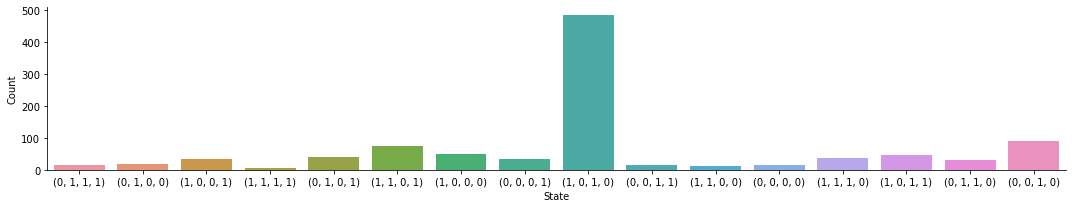

In [30]:
from pytket.extensions.qiskit import IBMQEmulatorBackend 

backend2 = IBMQEmulatorBackend('ibmq_quito',hub='ibm-q', group='open', project='main')

circ_initial = circuit_from_qasm('H2JordanWignerMapper.qasm')
circ_initial.measure_all()

ibm_rebase.apply(circ_initial)

place = PlacementPass(GraphPlacement(backend2.backend_info.architecture))
place.apply(circ_initial)

handle2 = backend2.process_circuit(circ_initial, n_shots=1000)
result2 = backend2.get_result(handle2)
counts2=result2.get_counts()
plot_counts(counts2)


In [31]:
counts2

Counter({(0, 1, 1, 1): 14,
         (0, 1, 0, 0): 19,
         (1, 0, 0, 1): 35,
         (1, 1, 1, 1): 7,
         (0, 1, 0, 1): 39,
         (1, 1, 0, 1): 74,
         (1, 0, 0, 0): 48,
         (0, 0, 0, 1): 33,
         (1, 0, 1, 0): 485,
         (0, 0, 1, 1): 14,
         (1, 1, 0, 0): 13,
         (0, 0, 0, 0): 16,
         (1, 1, 1, 0): 37,
         (1, 0, 1, 1): 46,
         (0, 1, 1, 0): 31,
         (0, 0, 1, 0): 89})

runtime_job._start_websocket_client:WARNING:2023-03-20 18:36:54,130: An error occurred while streaming results from the server for job cgcfo4eeecr5v111jbdg:
Traceback (most recent call last):
  File "C:\Users\kathrin.spendier\Anaconda3\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 454, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\kathrin.spendier\Anaconda3\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\kathrin.spendier\Anaconda3\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'



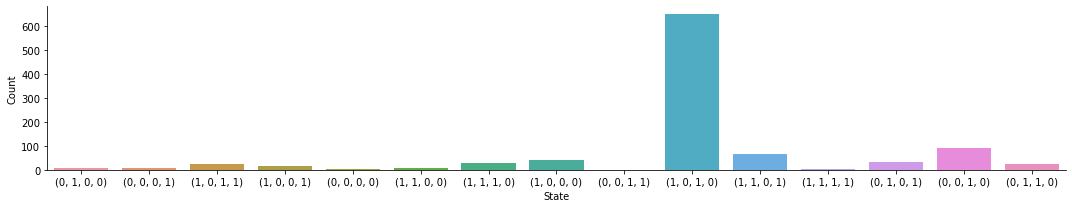

In [32]:
from pytket.extensions.qiskit import IBMQEmulatorBackend 

backend2 = IBMQEmulatorBackend('ibmq_quito',hub='ibm-q', group='open', project='main')
circ_initial = circuit_from_qasm('H2JordanWignerMapper.qasm')
comp_c3=backend2.get_compiled_circuit(circ_initial.measure_all(),2)

handle3 = backend2.process_circuit(comp_c3, n_shots=1000)
result3 = backend2.get_result(handle3)
counts3=result3.get_counts()
plot_counts(counts3)


In [33]:
counts3


Counter({(0, 1, 0, 0): 6,
         (0, 0, 0, 1): 9,
         (1, 0, 1, 1): 24,
         (1, 0, 0, 1): 17,
         (0, 0, 0, 0): 2,
         (1, 1, 0, 0): 6,
         (1, 1, 1, 0): 29,
         (1, 0, 0, 0): 40,
         (0, 0, 1, 1): 1,
         (1, 0, 1, 0): 649,
         (1, 1, 0, 1): 66,
         (1, 1, 1, 1): 2,
         (0, 1, 0, 1): 31,
         (0, 0, 1, 0): 93,
         (0, 1, 1, 0): 25})

### Running on actual Quito

When you submit a job to a IBMQ quantum computer, it enters the scheduler for the specific system, joining the pool of jobs (from all users) that are waiting to be executed on that system. You may be in the queued for hours until your circuit runs on the device.

In [34]:
from pytket.extensions.qiskit import IBMQBackend 

backend4 = IBMQBackend('ibmq_quito',hub='ibm-q', group='open', project='main')
circ_initial = circuit_from_qasm('H2JordanWignerMapper.qasm')
comp_c4=backend4.get_compiled_circuit(circ_initial.measure_all(),2)

handle4 = backend4.process_circuit(comp_c4, n_shots=1000)
result4 = backend4.get_result(handle4)
counts4 = result4.get_counts()
plot_counts(counts4)

Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is QUEUED
Job status is

KeyboardInterrupt: 

### Results (vary slightly between runs)
<br>

| Compiler | Compiler Version | Backend | Optimization Level | Total # of Gates | 2-qubit Gates |Counts for "1,0,1,0" state out of 1000 |
| --- | --- | --- | --- | --- | --- | --- |
| TKET | 1.13.1 |Perfect Simulator |- | 150 | 56 | 1000 |
| TKET | 1.13.1 |Quito Emulator | route & place | 250 | 115 | 485|
| TKET | 1.13.1 |Quito Emulator | 2 | 78| 19 | 649 |
| TKET | 1.13.1 |Quito  | 2 | 78| 19 | ??? |

<br>

In today’s NISQ area, this difference in the reduction of the number of gates and hardware noise performance can matter deciding between the success and failure of implementing a circuit on a real quantum computer.

# Appendix: Run on Quantinuum H1 emulator

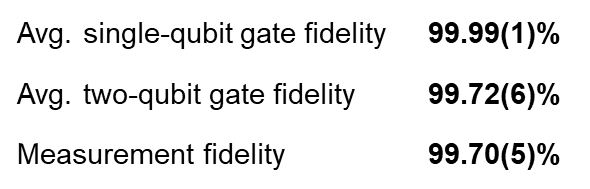

## Access to Quantinuum Backends

1) You can access Quantinuum emulators and quantum machines through [Microsoft Azure Quantum](https://azure.microsoft.com/en-us/products/quantum). 

In [68]:
## For Azure credits, first
#pip install pytket-qsharp
#from pytket.extensions.qsharp import AzureBackend

## call H1-1 Emulator
#backend3 = AzureBackend("quantinuum.hqs-lt-s1-sim",resourceId="your resource ID",location="westus")

2) You can also get access the Quantinuum H-series via the [Oak Ridge National Laboratory Quantum Computing User Program Access (QCUP)](https://www.olcf.ornl.gov/olcf-resources/compute-systems/quantum-computing-user-program/quantum-computing-user-support-documentation/).

In [53]:
## For access via Oak Ridge first run
#pip install pytket-quantinuum

from pytket.extensions.quantinuum import QuantinuumBackend

backend5 = QuantinuumBackend('H1-2E') # emulator

circ_initial = circuit_from_qasm('H2JordanWignerMapper.qasm')
comp_c5=backend5.get_compiled_circuit(circ_initial.measure_all(),2)

print(f"Our circuit has {comp_c5.n_gates} quantum gates in total and an overall")
print(f"depth of {comp_c5.depth()}.")
print(f"Of these gates {comp_c5.n_gates_of_type(OpType.ZZMax)} are two qubit gate, ZZMax, counts.")

Enter your Quantinuum email: kathrin.spendier@quantinuum.com
Enter your Quantinuum password: ········
Our circuit has 57 quantum gates in total and an overall
depth of 36.
Of these gates 17 are two qubit gate, ZZMax, counts.


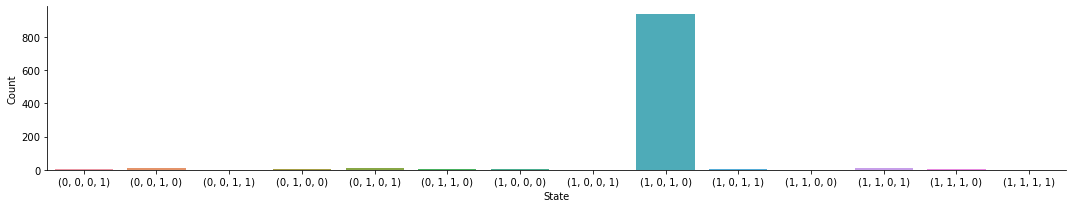

Counter({(0, 0, 0, 1): 5,
         (0, 0, 1, 0): 8,
         (0, 0, 1, 1): 1,
         (0, 1, 0, 0): 3,
         (0, 1, 0, 1): 11,
         (0, 1, 1, 0): 7,
         (1, 0, 0, 0): 3,
         (1, 0, 0, 1): 1,
         (1, 0, 1, 0): 938,
         (1, 0, 1, 1): 3,
         (1, 1, 0, 0): 1,
         (1, 1, 0, 1): 13,
         (1, 1, 1, 0): 5,
         (1, 1, 1, 1): 1})

In [55]:
handle5 = backend5.process_circuit(comp_c5, n_shots=1000)
result5 = backend5.get_result(handle5)
counts5=result5.get_counts()
plot_counts(counts5)
counts5

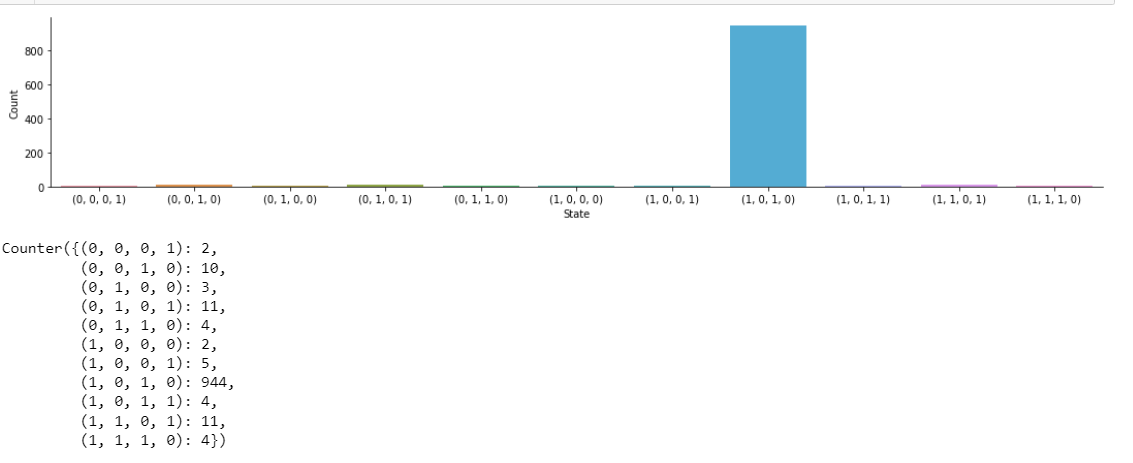

### Results (vary slightly between runs)
<br>

| Compiler | Compiler Version | Backend | Optimization Level | Total # of Gates | 2-qubit Gates |Counts for "1,0,1,0" state out of 100 |
| --- | --- | --- | --- | --- | --- | --- |
| TKET | 1.13.1 |Perfect Simulator |- | 150 | 56 | 1000 |
| TKET | 1.13.1 |Quito Emulator | route & place | 250 | 115 | 485|
| TKET | 1.13.1 |Quito Emulator | 2 | 78| 19 | 649 |
| TKET | 1.13.1 |Quito  | 2 | 78| 19 | ??? |
| TKET | 1.13.1 |H1-1 Emulator | 2 | 61 | 18 | 938 |

